This to compare the accuracy of the text extracted

Used two different PDF parsers to compare

In [18]:
import fitz  # PyMuPDF
import pdfplumber
import re
start_heading = 'HEADNOTE'
end_heading = 'JUDGMENT'


def parse_pdf_pymupdf(file_path):
    # Open the PDF
    try:
        # Open the PDF file
        doc = fitz.open(pdf_path)
    except FileNotFoundError:
        print(f"The file {pdf_path} was not found.")
        return ""
    except Exception as e:
        print(f"An error occurred while opening the file: {e}")
        return ""
    #doc = fitz.open(file_path)
    text = ""
    extracting = False
    for page_num in range(len(doc)):
        page = doc[page_num]
        page_text = page.get_text("text")
        lines = page_text.split('\n')
        for line in lines:
            if end_heading in line and extracting:
                extracting = False
                break  # Stop extracting after the end heading
            if (not re.match(r'^\d|http', line)) and line!="SUPREME COURT OF INDIA" and extracting and (not re.match(r'Page', line)) and len(line)!=0 :
               text += line + '\n'
            if start_heading in line:
                extracting = True
    return text.strip()

def parse_pdf_pdfplumber(file_path):
    #text = ""
    # Open the PDF
    try:
        # Open the PDF file
        doc=pdfplumber.open(file_path)
    except FileNotFoundError:
        print(f"The file {pdf_path} was not found.")
        return ""
    except Exception as e:
        print(f"An error occurred while opening the file: {e}")
        return ""
    
    text = ""
    extracting = False
    for page in doc.pages:
        page_text = page.extract_text()
        lines = page_text.split('\n')
        for line in lines:
            if end_heading in line and extracting:
                extracting = False
                break  # Stop extracting after the end heading
            if (not re.match(r'^\d|http', line)) and line!="SUPREME COURT OF INDIA" and extracting and (not re.match(r'Page', line)) and len(line)!=0 :
               text += line + '\n'
            if start_heading in line:
                extracting = True
    return text.strip()

sym_diff=[]
text_pdfplumbers=[]
text_pymupdfs=[]
length=[]

for i in range(1000,12855):
    # Path to your PDF
    pdf_path = str(i)+'.pdf'
    print(pdf_path)

    # Extract text using PyMuPDF
    text_pymupdf = parse_pdf_pymupdf(pdf_path)

    # Extract text using pdfplumber
    text_pdfplumber = parse_pdf_pdfplumber(pdf_path)
    text_pdfplumbers.append(text_pdfplumber)
    text_pymupdfs.append(text_pymupdf)

    s=(text_pymupdf.split())
    k=(text_pdfplumber.split())

    sym_dif=list(set(s).symmetric_difference(set(k)))
    sym_diff.append(sym_dif)
    l=len(sym_dif)
    length.append(l)

df=pd.DataFrame()
df["sym_diff"]=sym_diff
df["text_pdfplumber"]=text_pdfplumbers
df["text_pymupdf"]=text_pymupdfs
df["length"]=length



1000.pdf
1001.pdf
1002.pdf
1003.pdf
1004.pdf
1005.pdf
1006.pdf
1007.pdf
1008.pdf
1009.pdf
1010.pdf
1011.pdf
1012.pdf
1013.pdf
1014.pdf
1015.pdf
1016.pdf
1017.pdf
1018.pdf
1019.pdf
1020.pdf
1021.pdf
1022.pdf
1023.pdf
1024.pdf
1025.pdf
1026.pdf
1027.pdf
1028.pdf
1029.pdf
1030.pdf
1031.pdf
1032.pdf
1033.pdf
1034.pdf
1035.pdf
1036.pdf
1037.pdf
1038.pdf
1039.pdf
1040.pdf
1041.pdf
1042.pdf
1043.pdf
1044.pdf
1045.pdf
1046.pdf
1047.pdf
1048.pdf
1049.pdf
1050.pdf
1051.pdf
1052.pdf
1053.pdf
1054.pdf
1055.pdf
1056.pdf
1057.pdf
1058.pdf
1059.pdf
1060.pdf
1061.pdf
1062.pdf
1063.pdf
1064.pdf
1065.pdf
1066.pdf
1067.pdf
1068.pdf
1069.pdf
1070.pdf
1071.pdf
1072.pdf
1073.pdf
1074.pdf
1075.pdf
1076.pdf
1077.pdf
1078.pdf
1079.pdf
1080.pdf
1081.pdf
1082.pdf
1083.pdf
1084.pdf
1085.pdf
1086.pdf
1087.pdf
1088.pdf
1089.pdf
1090.pdf
1091.pdf
1092.pdf
1093.pdf
1094.pdf
1095.pdf
1096.pdf
1097.pdf
1098.pdf
1099.pdf
1100.pdf
1101.pdf
1102.pdf
1103.pdf
1104.pdf
1105.pdf
1106.pdf
1107.pdf
1108.pdf
1109.pdf
1110.pdf
1

In [ ]:
df.to_csv("sym_diff.csv",index=False)

<Axes: title={'center': 'Length of symmetric difference between text extracted by pdfplumber and PyMuPDF'}>

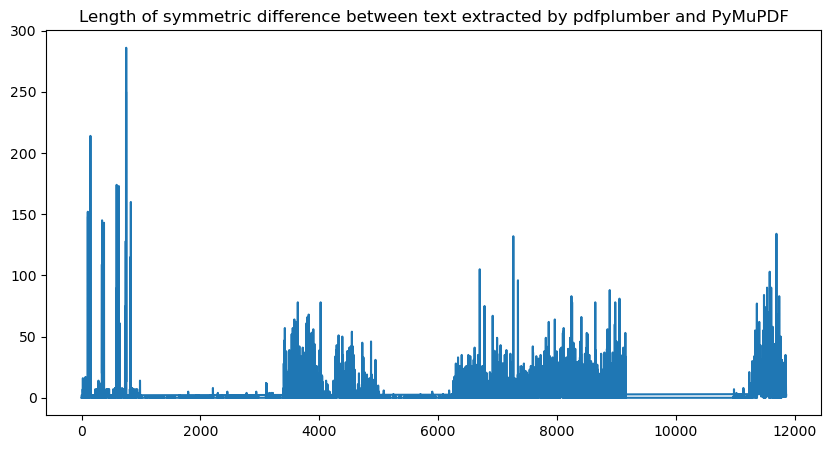

In [42]:
from matplotlib import pyplot as plt
df_final["length"].plot(kind="line",title="Length of symmetric difference between text extracted by pdfplumber and PyMuPDF",figsize=(10,5))